### 농어(perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

# 1. 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달

from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


# 2. 모델 학습 (Polynomial Regression)
- 다항식을 사용한 선형 회귀
- 데이터가 곡선으로 나타나는 경우에 사용
- 1개의 독립 변수를 이용해 **차수(degree)** 를 높이는 형태
- $ y = ax^2 + bx + c $
- 차수를 높였을 때 기존 모델보다 더 적은 오차를 만듦 ($ R^2 $ 값 증가)
- 너무 많은 차수를 사용하면 overfitting 가능성 높아짐
    - overfitting 막으면서 차수를 적절히 조절할 수 있는 Ridge, Lasso라는 규제 클래스가 있다.

### 2-1. 최적의 곡선 찾기
- 2차 방정식을 위해 독립변수($x$)를 제곱한 항을 추가해주어야 한다.
    - ```np.column_stack(([a, b]))``` : 두 개의 1차원 배열을 칼럼으로 세로(열 방향)로 붙여서 2차원 배열 만드는 넘파이 기능

In [2]:
train_poly = np.column_stack((train_data**2, train_data)) # (1열 = 길이의 제곱, 2열 = 길이)의 2차원 배열을 train_poly에 assign
test_poly = np.column_stack((test_data**2, test_data)) # (1열 = 길이의 제곱, 2열 = 길이)의 2차원 배열을 test_poly에 assign

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

### 2-2. 정확도 ($R^2$) 확인

In [4]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 모델이 적절하게 훈련이 되었는지 확인하기 위해 훈련 세트와 테스트 세트 정확도 점수 비교

0.9706807451768623
0.9775935108325121


# 3. 예측 및 데이터 시각화

In [5]:
print(lr.predict([[100**2, 100]])) # 길이 100의 농어 무게를 예측해보자.
        # 훈련할 때 (길이의 제곱, 길이)를 넣고 훈련했으니 예측할 때에도 길이의 제곱 값을 함께 넣어주어야 한다!

[8103.57880667]


- **단순 선형 회귀를 사용했을 때 나온 값, 약 3192보다 더 높은 값인 8103을 예측했다. 약간의 과소적합이 남아있지만, 점수가 높아진 것 확인 할 수 있다.**

In [6]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


$ y = (lr.coef_)x**2 + (lr.coef_)x + (lr.intercept_) $

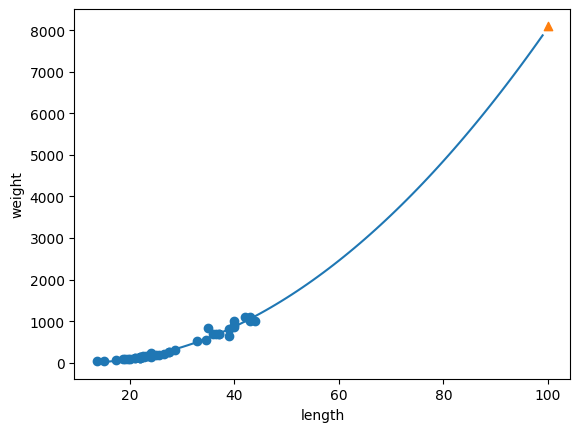

In [7]:
import matplotlib.pyplot as plt

point = np.arange(15 ,100) # 구간별 직선을 그리기 위해 15에서 99 까지 정수 배열을 만든다

plt.scatter(train_data, train_target)
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05) # 15에서 99까지 2차 방정식 그래프를 그린다.
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter([100], [8103], marker = '^')
# plt.scatter(100, 8103, marker = '^')
plt.show()

- **선형 회귀보다 $R^2$ 값이 더 높게 나왔으므로 농어의 길이를 이용해 무게를 예측할 때 선형 회귀보다 다항 회귀 모델이 더 적합하다는 것을 알 수 있다.**
- **위의 다항회귀 예시에서 생선의 길이라는 하나의 특징에 차수를 부여해 하나의 특징을 더 만들어냈다. 이처럼 차수가 1인 생선의 길이라는 단순한 특징을 제곱하여 또 다른 특징을 만들어 낼 수 있다. 여러 특징이 있을 때 정확도가 높아지기 때문에 특징이 하나일 때 다항회귀를 사용해 선형회귀보다 정확도를 높일 수 있다.**
- 너무 많은 차수를 사용하면 overfitting 가능성 높아질 수 있기 때문에 적절한 차수를 사용해야 한다. Ridge, Lasso라는 규제 클래스를 사용한다면 overfitting 막으면서 차수를 적절히 조절할 수 있다.